# Perlin Noise

The idea behind Perlin noise is to generate a series of varying random values. Then by adding them together we can create a more complex and natural-looking pattern. 

## How to implement 

### Algorithm

1. Create table (256 - number of pixels)
2. Shuffle the table
3. Stack the table - thus we create a 2d array (matrix).
4. Flat the table - thus we can apply our dot interpolations easily
5. Get grid coords - they are the same as rounding the x, y coords (convert to int)
6. Get the vector distance - (dot coords - grid coords)
7. Apply fade function to distance coordinates (optional, thus we achieve a more smooth end result)
8. Create gradient vector coordinates in all four corners
9. Apply linear interpolation

### Linear interpolation 

```python
def lerp(a, b, x):
    return a + x * (b - a)
```

### Fade 

```python
def fade(f):
    return 6 * f**5 - 15 * f**4 + 10 * f**3
```

### Gradient

```python
def gradient(c, x, y):
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    gradient_co = vectors[c % 4]
    return gradient_co[:, :, 0] * x + gradient_co[:, :, 1] * y
```

## Test the algorithm

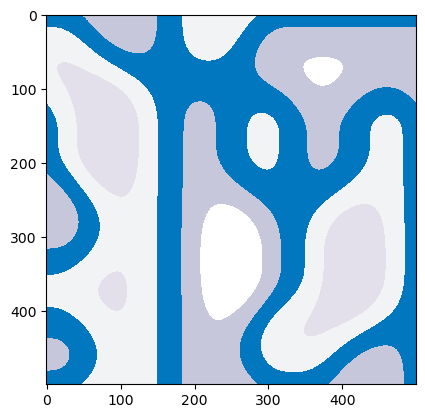

In [11]:

import numpy as np
import matplotlib.pyplot as plot
from matplotlib.colors import ListedColormap


def perlin(x, y, seed=0):
    np.random.seed(seed)
    ptable = np.arange(256, dtype=int)

    np.random.shuffle(ptable)

    ptable = np.stack([ptable, ptable]).flatten()

    xi, yi = x.astype(int), y.astype(int)

    xg, yg = x - xi, y - yi

    xf, yf = fade(xg), fade(yg)

    n00 = gradient(ptable[ptable[xi] + yi], xg, yg)
    n01 = gradient(ptable[ptable[xi] + yi + 1], xg, yg - 1)
    n11 = gradient(ptable[ptable[xi + 1] + yi + 1], xg - 1, yg - 1)
    n10 = gradient(ptable[ptable[xi + 1] + yi], xg - 1, yg)

    x1 = lerp(n00, n10, xf)
    x2 = lerp(n01, n11, xf)
    return lerp(x1, x2, yf)


def lerp(a, b, x):
    return a + x * (b - a)

def fade(f):
    return 6 * f**5 - 15 * f**4 + 10 * f**3

def gradient(c, x, y):
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    gradient_co = vectors[c % 4]
    return gradient_co[:, :, 0] * x + gradient_co[:, :, 1] * y

lin_array2 = np.linspace(157,160, 500, endpoint=False)

# create grid using linear 1d arrays
x, y = np.meshgrid(lin_array2, lin_array2)


cmap = ListedColormap(['#ffffff', "#C6C7DA", '#0077be', "#F1F3F4", "#E3E0EC"  ])

plot.imshow(perlin(x, y, seed=2), cmap=cmap, origin='upper')

plot.show()
